# Model Using 1/3 Window - Normalized
## Both UX and UY

In [11]:
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [12]:
model = tf.keras.models.load_model("/Users/kunwoosmac/Library/CloudStorage/OneDrive-IllinoisInstituteofTechnology/Lab PC backup/Pitching Airfoil/models/Testing effect of window size/one thirds/iter 1.h5")

In [13]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
dir = '/Users/kunwoosmac/Library/CloudStorage/OneDrive-IllinoisInstituteofTechnology/Lab PC backup/Pitching Airfoil/dataset/window_normalized/Window Size/one thirds'

## TEST DATA

In [15]:
test_X = np.load(dir + '/test_X.npy')
test_Y = (np.load(dir + '/test_Y.npy')).reshape(-1,2)

Y = np.zeros((len(test_Y), 1), dtype = '<U10')
for i in range(len(test_Y)):
    Y[i] = (str(test_Y[i,0])+', '+ str(test_Y[i, 1]))
test_Y = Y

OHE = OneHotEncoder(sparse_output = False)
test_Y = OHE.fit_transform(test_Y)

OHE.categories_

[array(['25.0, 0.05', '25.0, 0.1', '25.0, 0.2', '25.0, 0.25', '25.0, 0.3',
        '25.0, 0.35', '25.0, 0.4', '25.0, 0.5', '30.0, 0.05', '30.0, 0.1',
        '30.0, 0.2', '30.0, 0.25', '30.0, 0.3', '30.0, 0.35', '30.0, 0.4',
        '30.0, 0.5'], dtype='<U10')]

In [16]:
# Get Predictions (reverse to_categorical)
pred_proba = model.predict(test_X)
prediction = np.argmax(pred_proba, axis = 1).reshape(-1)

actual = np.argmax(test_Y, axis = 1)

53/53 [==============================] - 3s 42ms/step


In [17]:
prediction[0:10], actual[0:10]

(array([ 5, 13, 13, 13, 11, 13, 13, 13, 13,  1]),
 array([ 7, 12, 13, 12, 11, 13,  9, 13, 12,  1]))

In [18]:
print(classification_report(actual, prediction))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76        56
           1       0.82      1.00      0.90        56
           2       1.00      0.90      0.95        52
           3       0.00      0.00      0.00        52
           4       0.41      1.00      0.58        55
           5       0.14      1.00      0.24        56
           6       1.00      0.30      0.46        67
           7       0.00      0.00      0.00        57
           8       0.00      0.00      0.00       154
           9       1.00      0.06      0.12       154
          10       1.00      0.85      0.92       158
          11       1.00      0.57      0.73       158
          12       0.00      0.00      0.00       155
          13       0.28      1.00      0.43       154
          14       0.00      0.00      0.00       143
          15       1.00      1.00      1.00       153

    accuracy                           0.48      1680
   macro avg       0.54   

/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [19]:
correct = 0
wrong_indices = []
wrong_actual = []
wrong_pred = []

for i in range(actual.shape[0]):
    if actual[i] == prediction[i]:
        correct += 1
    else:
        wrong_indices.append(i)
        wrong_pred.append(prediction[i])
        wrong_actual.append(actual[i])


accuracy = correct/int(actual.shape[0])
print("Test Accuracy = ", accuracy)

Test Accuracy =  0.48214285714285715


Confusion matrix, without normalization


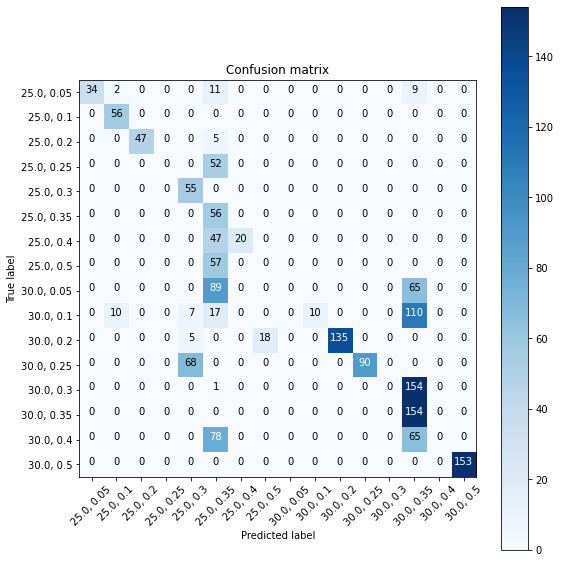

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(actual, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=list(OHE.categories_)[0],normalize=False,
                      title='Confusion matrix')
plt.show()

## VALIDATION DATA

In [ ]:
val_X = np.load(dir + r'\val_X.npy')
val_Y = (np.load(dir + r'\val_Y.npy')).reshape(-1,2)
Y = np.zeros((len(val_Y), 1), dtype = '<U10')
for i in range(len(val_Y)):
    Y[i] = (str(val_Y[i,0])+', '+ str(val_Y[i, 1]))
val_Y = Y

val_Y = OHE.transform(val_Y)

In [ ]:
# Get Predictions (reverse to_categorical)
pred_proba = model.predict(val_X)
prediction = np.argmax(pred_proba, axis = 1)
actual = np.argmax(val_Y, axis = 1)
del val_X
del val_Y

In [ ]:
print(classification_report(actual, prediction))

In [ ]:
correct = 0
wrong_indices = []
wrong_actual = []
wrong_pred = []

for i in range(actual.shape[0]):
    if actual[i] == prediction[i]:
        correct += 1
    else:
        wrong_indices.append(i)
        wrong_pred.append(prediction[i])
        wrong_actual.append(actual[i])


accuracy = correct/int(actual.shape[0])
print("Validation Accuracy = ", accuracy)

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(actual, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=list(OHE.categories_)[0],normalize=False,
                      title='Confusion matrix')
plt.show()

## TRAIN DATA

In [ ]:
train_X = np.load(dir + r'\train_X.npy', mmap_mode='r')
train_Y = (np.load(dir + r'\train_Y.npy')).reshape(-1,2)
Y = np.zeros((len(train_Y), 1), dtype = '<U10')
for i in range(len(train_Y)):
    Y[i] = (str(train_Y[i,0])+', '+ str(train_Y[i, 1]))
train_Y = Y

train_Y = OHE.transform(train_Y)

# Get Predictions (reverse to_categorical)
pred_proba = model.predict(train_X)
prediction = np.argmax(pred_proba, axis = 1)
actual = np.argmax(train_Y, axis = 1)

In [ ]:
print(classification_report(actual, prediction))

In [ ]:
correct = 0
wrong_indices = []
wrong_actual = []
wrong_pred = []

for i in range(actual.shape[0]):
    if actual[i] == prediction[i]:
        correct += 1
    else:
        wrong_indices.append(i)
        wrong_pred.append(prediction[i])
        wrong_actual.append(actual[i])


accuracy = correct/int(actual.shape[0])
print("Train Accuracy = ", accuracy)

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(actual, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=list(OHE.categories_)[0],normalize=False,
                      title='Confusion matrix')
plt.show()